In [1]:
import matplotlib.image as mpimg
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2
#import zipfile
from PIL import Image
  
from keras.callbacks import EarlyStopping
#from keras.preprocessing import image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from keras.utils import image_dataset_from_directory
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras import layers
from tensorflow import keras
#from layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split
#from zipfile import ZipFile
  
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing path for dataset
data_path='c:\\ZHAW\\23FS\\KI\\DataForProject'
train_path='c:\\ZHAW\\23FS\\KI\\DataForProject\\Train'

#Variables for resizing
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

#Getting Total Nr of Classes from Train Folder
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [3]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [4]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = train_path + "\\" + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '\\' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)


(39209, 30, 30, 3) (39209,)


In [5]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

(X_test, y_test) = (image_data, image_labels)
X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)
X_test.shape (39209, 30, 30, 3)
y_test.shape (39209,)


In [6]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [7]:
#Creating data augementation layers
data_augmentation = tf.keras.Sequential([
  layers.RandomContrast(0.5),
  layers.RandomBrightness(0.5),
  layers.RandomZoom(.5, .2)
])

In [8]:
input_shape = (30, 30, 3) #30x30 Images in black/white, to have RGB 30, 30, 3


model1 = tf.keras.Sequential([
# input layer
tf.keras.Input(shape=input_shape),

#Data Augmentation layers
data_augmentation,

# first convolution layer
tf.keras.layers.Conv2D(16, kernel_size=3, activation="relu"),
tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
# second convolution layer
tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu"),
tf.keras.layers.Conv2D(128, kernel_size=3, activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
# fully connected classifier
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
])

In [9]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model1.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
687/687 [==============================] - 28s 39ms/step - loss: 3.5419 - accuracy: 0.0512 - val_loss: 3.5212 - val_accuracy: 0.0537
Epoch 2/15
687/687 [==============================] - 29s 42ms/step - loss: 3.5066 - accuracy: 0.0552 - val_loss: 3.5041 - val_accuracy: 0.0523
Epoch 3/15
687/687 [==============================] - 34s 49ms/step - loss: 3.5000 - accuracy: 0.0560 - val_loss: 3.5142 - val_accuracy: 0.0552
Epoch 4/15
687/687 [==============================] - 31s 46ms/step - loss: 3.5185 - accuracy: 0.0538 - val_loss: 3.5393 - val_accuracy: 0.0543
Epoch 5/15
687/687 [==============================] - 29s 43ms/step - loss: 3.5061 - accuracy: 0.0557 - val_loss: 3.5205 - val_accuracy: 0.0472
Epoch 6/15
687/687 [==============================] - 29s 42ms/step - loss: 3.4976 - accuracy: 0.0579 - val_loss: 3.4992 - val_accuracy: 0.0539
Epoch 7/15
687/687 [==============================] - 30s 44ms/step - loss: 3.4942 - accuracy: 0.0570 - val_loss: 3.4993 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

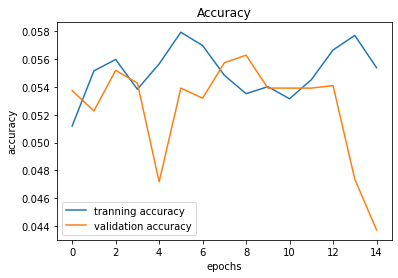

In [11]:
#accuracy
plt.figure(0)
plt.plot(history.history['accuracy'],label='tranning accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

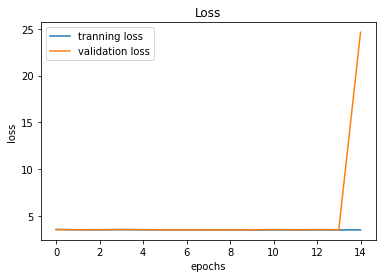

In [12]:
#Loss
plt.plot(history.history['loss'],label='tranning loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show

# Model 2

Now implementing kernel size (3,3) and pool size (2,2)

In [13]:
input_shape = (30, 30, 3) #30x30 Images in black/white, to have RGB 30, 30, 3


model2 = tf.keras.Sequential([
# input layer
tf.keras.Input(shape=input_shape),

#Data Augmentation layers
data_augmentation,

# first convolution layer
tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu"),
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
# second convolution layer
tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
# fully connected classifier
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
])

In [14]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history2 = model2.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
687/687 [==============================] - 30s 41ms/step - loss: 3.5569 - accuracy: 0.0514 - val_loss: 3.5456 - val_accuracy: 0.0559
Epoch 2/15
687/687 [==============================] - 30s 44ms/step - loss: 3.5148 - accuracy: 0.0538 - val_loss: 3.5034 - val_accuracy: 0.0539
Epoch 3/15
687/687 [==============================] - 30s 44ms/step - loss: 3.5076 - accuracy: 0.0539 - val_loss: 3.4997 - val_accuracy: 0.0563
Epoch 4/15
687/687 [==============================] - 37s 54ms/step - loss: 3.5123 - accuracy: 0.0568 - val_loss: 3.6358 - val_accuracy: 0.0563
Epoch 5/15
687/687 [==============================] - 32s 47ms/step - loss: 3.5047 - accuracy: 0.0560 - val_loss: 3.5124 - val_accuracy: 0.0563
Epoch 6/15
687/687 [==============================] - 32s 46ms/step - loss: 3.5010 - accuracy: 0.0527 - val_loss: 3.4914 - val_accuracy: 0.0557
Epoch 7/15
687/687 [==============================] - 33s 48ms/step - loss: 3.5011 - accuracy: 0.0528 - val_loss: 3.5713 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

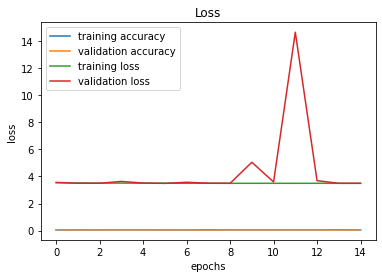

In [17]:
#accuracy
plt.figure(0)
plt.plot(history2.history['accuracy'],label='training accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

#Loss
plt.plot(history2.history['loss'],label='training loss')
plt.plot(history2.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show

# Model 3

Implementing Batch Normalizationd and Dropout

In [18]:
input_shape = (30, 30, 3) #30x30 Images in black/white, to have RGB 30, 30, 3


model3 = tf.keras.Sequential([
# input layer
tf.keras.Input(shape=input_shape),

#Data Augmentation layers
data_augmentation,

# first convolution layer
tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu"),
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
tf.keras.layers.BatchNormalization(axis=-1),
# second convolution layer
tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
tf.keras.layers.BatchNormalization(axis=-1),
# fully connected classifier
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation="relu"),
tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
])

In [19]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history3 = model3.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
687/687 [==============================] - 32s 44ms/step - loss: 4.2487 - accuracy: 0.0415 - val_loss: 3.5594 - val_accuracy: 0.0537
Epoch 2/15
687/687 [==============================] - 31s 45ms/step - loss: 3.8373 - accuracy: 0.0483 - val_loss: 3.6072 - val_accuracy: 0.0379
Epoch 3/15
687/687 [==============================] - 33s 48ms/step - loss: 3.7073 - accuracy: 0.0515 - val_loss: 3.6977 - val_accuracy: 0.0421
Epoch 4/15
687/687 [==============================] - 38s 55ms/step - loss: 3.6496 - accuracy: 0.0487 - val_loss: 3.5923 - val_accuracy: 0.0472
Epoch 5/15
687/687 [==============================] - 35s 51ms/step - loss: 3.6137 - accuracy: 0.0511 - val_loss: 3.6782 - val_accuracy: 0.0532
Epoch 6/15
687/687 [==============================] - 39s 56ms/step - loss: 3.5909 - accuracy: 0.0506 - val_loss: 3.5344 - val_accuracy: 0.0539
Epoch 7/15
687/687 [==============================] - 35s 51ms/step - loss: 3.5726 - accuracy: 0.0529 - val_loss: 3.5082 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

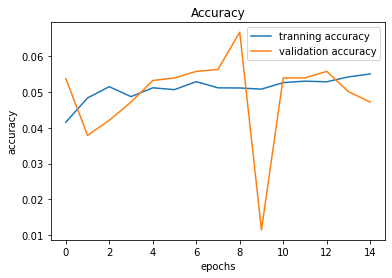

In [21]:
#accuracy
plt.figure(0)
plt.plot(history3.history['accuracy'],label='tranning accuracy')
plt.plot(history3.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

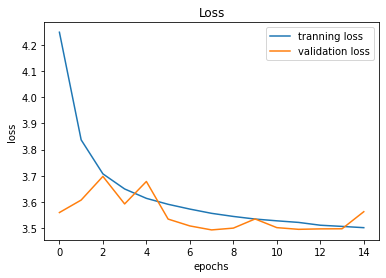

In [23]:
#Loss
plt.plot(history3.history['loss'],label='tranning loss')
plt.plot(history3.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show

# Model 4

Playing with learning rate

In [24]:
input_shape = (30, 30, 3) #30x30 Images in black/white, to have RGB 30, 30, 3


model4 = tf.keras.Sequential([
# input layer
tf.keras.Input(shape=input_shape),

#Data Augmentation layers
data_augmentation,

# first convolution layer
tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu"),
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
tf.keras.layers.BatchNormalization(axis=-1),
# second convolution layer
tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
tf.keras.layers.BatchNormalization(axis=-1),
# fully connected classifier
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
])

In [25]:
#epoch
lr = 0.01
epochs = 15

opt = Adam(learning_rate=lr)
model4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [26]:
history4 = model4.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
687/687 [==============================] - 26s 36ms/step - loss: 3.9737 - accuracy: 0.0484 - val_loss: 3.5886 - val_accuracy: 0.0563
Epoch 2/15
687/687 [==============================] - 25s 37ms/step - loss: 3.5300 - accuracy: 0.0552 - val_loss: 3.5086 - val_accuracy: 0.0563
Epoch 3/15
687/687 [==============================] - 26s 37ms/step - loss: 3.5334 - accuracy: 0.0527 - val_loss: 3.5254 - val_accuracy: 0.0472
Epoch 4/15
687/687 [==============================] - 29s 42ms/step - loss: 3.5371 - accuracy: 0.0526 - val_loss: 3.5387 - val_accuracy: 0.0537
Epoch 5/15
687/687 [==============================] - 28s 40ms/step - loss: 3.5450 - accuracy: 0.0526 - val_loss: 3.5320 - val_accuracy: 0.0539
Epoch 6/15
687/687 [==============================] - 27s 39ms/step - loss: 3.5485 - accuracy: 0.0531 - val_loss: 5.4552 - val_accuracy: 0.0104
Epoch 7/15
687/687 [==============================] - 27s 39ms/step - loss: 3.5567 - accuracy: 0.0508 - val_loss: 3.5293 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

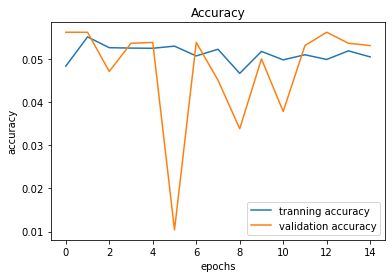

In [27]:
#accuracy
plt.figure(0)
plt.plot(history4.history['accuracy'],label='tranning accuracy')
plt.plot(history4.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

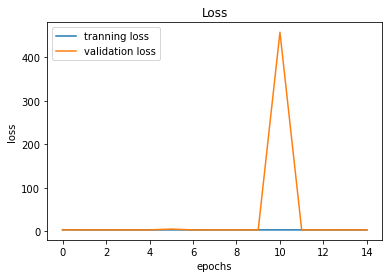

In [28]:
#Loss
plt.plot(history4.history['loss'],label='tranning loss')
plt.plot(history4.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show

# Model 5

In [29]:
input_shape = (30, 30, 3) #30x30 Images in black/white, to have RGB 30, 30, 3


model5 = tf.keras.Sequential([
# input layer
tf.keras.Input(shape=input_shape),

#Data Augmentation layers
data_augmentation,

# first convolution layer
tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu"),
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.BatchNormalization(axis=-1),
# second convolution layer
tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.BatchNormalization(axis=-1),
# fully connected classifier
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
])

In [30]:
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
history5 = model5.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
687/687 [==============================] - 29s 39ms/step - loss: 4.2361 - accuracy: 0.0402 - val_loss: 3.5591 - val_accuracy: 0.0563
Epoch 2/15
687/687 [==============================] - 28s 40ms/step - loss: 3.8505 - accuracy: 0.0457 - val_loss: 3.5169 - val_accuracy: 0.0539
Epoch 3/15
687/687 [==============================] - 28s 41ms/step - loss: 3.7048 - accuracy: 0.0495 - val_loss: 3.5138 - val_accuracy: 0.0541
Epoch 4/15
687/687 [==============================] - 29s 42ms/step - loss: 3.6540 - accuracy: 0.0478 - val_loss: 3.5477 - val_accuracy: 0.0532
Epoch 5/15
687/687 [==============================] - 28s 41ms/step - loss: 3.6077 - accuracy: 0.0511 - val_loss: 3.5308 - val_accuracy: 0.0532
Epoch 6/15
687/687 [==============================] - 29s 42ms/step - loss: 3.5919 - accuracy: 0.0491 - val_loss: 3.5233 - val_accuracy: 0.0537
Epoch 7/15
687/687 [==============================] - 29s 42ms/step - loss: 3.5691 - accuracy: 0.0535 - val_loss: 3.5089 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

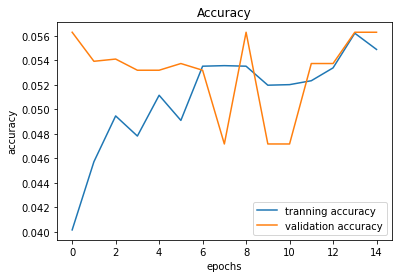

In [32]:
#accuracy
plt.figure(0)
plt.plot(history5.history['accuracy'],label='tranning accuracy')
plt.plot(history5.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

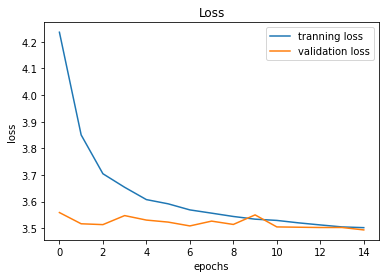

In [33]:
#Loss
plt.plot(history5.history['loss'],label='tranning loss')
plt.plot(history5.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show

In [34]:
input_shape = (30, 30, 3) #30x30 Images in black/white, to have RGB 30, 30, 3


model6 = tf.keras.Sequential([
# input layer
tf.keras.Input(shape=input_shape),

#Data Augmentation layers
data_augmentation,

# first convolution layer
tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu"),
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.BatchNormalization(axis=-1),
# second convolution layer
tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),

# fully connected classifier
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
])

In [35]:
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history6 = model6.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
687/687 [==============================] - 29s 39ms/step - loss: 3.8222 - accuracy: 0.0435 - val_loss: 3.5297 - val_accuracy: 0.0543
Epoch 2/15
687/687 [==============================] - 28s 40ms/step - loss: 3.6424 - accuracy: 0.0501 - val_loss: 3.5023 - val_accuracy: 0.0537
Epoch 3/15
687/687 [==============================] - 28s 40ms/step - loss: 3.5871 - accuracy: 0.0506 - val_loss: 3.5206 - val_accuracy: 0.0532
Epoch 4/15
687/687 [==============================] - 28s 41ms/step - loss: 3.5609 - accuracy: 0.0542 - val_loss: 3.7712 - val_accuracy: 0.0532
Epoch 5/15
687/687 [==============================] - 28s 41ms/step - loss: 3.5427 - accuracy: 0.0509 - val_loss: 3.5425 - val_accuracy: 0.0546
Epoch 6/15
687/687 [==============================] - 28s 41ms/step - loss: 3.5374 - accuracy: 0.0533 - val_loss: 3.5254 - val_accuracy: 0.0532
Epoch 7/15
687/687 [==============================] - 28s 41ms/step - loss: 3.5251 - accuracy: 0.0524 - val_loss: 3.5032 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

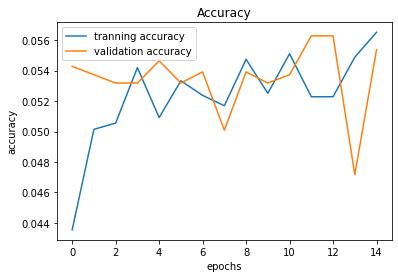

In [37]:
#accuracy
plt.figure(0)
plt.plot(history6.history['accuracy'],label='tranning accuracy')
plt.plot(history6.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

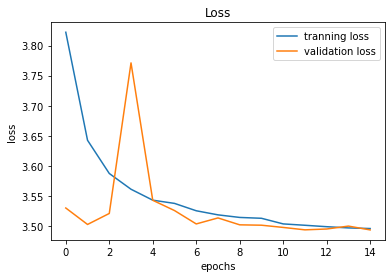

In [38]:
#Loss
plt.plot(history6.history['loss'],label='tranning loss')
plt.plot(history6.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show